In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Working with (social) graphs: Networkx

In [2]:
nx.__version__


'2.4'

## Creating a simple graph

In [3]:
#create an empty graph
g = nx.Graph()

In [4]:
g

In [5]:
#add nodes to the graph:
nodes = (['Alice', 'Bob', 'Carol', 'Danny'])
g.add_nodes_from(nodes)
g.nodes()

NodeView(('Alice', 'Bob', 'Carol', 'Danny'))

In [6]:
list(g.nodes())

['Alice', 'Bob', 'Carol', 'Danny']

In [7]:
edges = [['Alice', 'Carol'], ['Bob', 'Carol'], ['Bob', 'Danny']]
g.add_edges_from(edges)
g.edges()

EdgeView([('Alice', 'Carol'), ('Bob', 'Carol'), ('Bob', 'Danny')])

In [8]:
g.add_edges_from([["Alice", "Xaver"]])

In [9]:
g.nodes()

NodeView(('Alice', 'Bob', 'Carol', 'Danny', 'Xaver'))

In [10]:
g.add_nodes_from([1,2,3])
g.nodes()

NodeView(('Alice', 'Bob', 'Carol', 'Danny', 'Xaver', 1, 2, 3))

In [11]:
g.add_node('Paul')

In [12]:
g.add_edge('Alice','Paul')
g.edges()

EdgeView([('Alice', 'Carol'), ('Alice', 'Xaver'), ('Alice', 'Paul'), ('Bob', 'Carol'), ('Bob', 'Danny')])

In [13]:
list(g.neighbors('Bob'))

['Carol', 'Danny']

## Plotting a graph

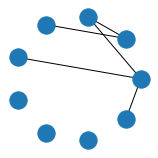

In [14]:
plt.figure(figsize = (2, 2))
nx.draw_circular(g, with_labels = False)
plt.show()

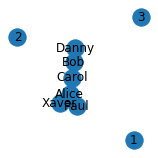

In [15]:
plt.figure(figsize = (2, 2))
nx.draw_spring(g, with_labels = True)
plt.show()

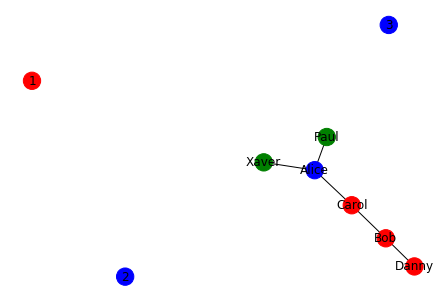

In [16]:
colors = ['b', 'r', 'r', 'r','g','r','b','b','g']
nx.draw(g, with_labels = True, node_color = colors)
plt.show()

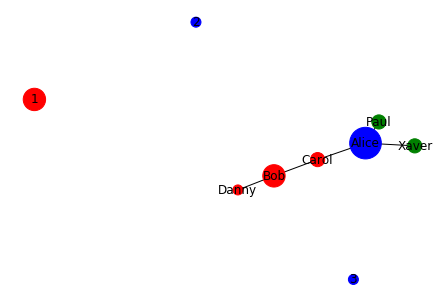

In [17]:
colors = col_agents = ['b', 'r', 'r', 'r','g','r','b','b','g']
nx.draw(g, with_labels = True, node_color = colors, node_size=[1000,500,200,100,200,500,100,100,200])
plt.show()

## Node and edge attributes

In [18]:
nodes = (["Emil", "Fred"])
g.add_nodes_from(nodes, student=True)
g.nodes().data()

NodeDataView({'Alice': {}, 'Bob': {}, 'Carol': {}, 'Danny': {}, 'Xaver': {}, 1: {}, 2: {}, 3: {}, 'Paul': {}, 'Emil': {'student': True}, 'Fred': {'student': True}})

In [19]:
g.add_edges_from([("Danny", "Emil"), ("Danny", "Fred")], weight=2.0)
print (g.edges())
print (g.edges.data())

[('Alice', 'Carol'), ('Alice', 'Xaver'), ('Alice', 'Paul'), ('Bob', 'Carol'), ('Bob', 'Danny'), ('Danny', 'Emil'), ('Danny', 'Fred')]
[('Alice', 'Carol', {}), ('Alice', 'Xaver', {}), ('Alice', 'Paul', {}), ('Bob', 'Carol', {}), ('Bob', 'Danny', {}), ('Danny', 'Emil', {'weight': 2.0}), ('Danny', 'Fred', {'weight': 2.0})]


In [20]:
[elt for elt in g.neighbors('Alice')]

['Carol', 'Xaver', 'Paul']

In [21]:
G = nx.path_graph(4)  # or DiGraph, MultiGraph, MultiDiGraph, 

In [22]:
[n for n in G.neighbors(0)]

[1]

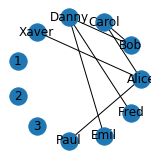

In [23]:
plt.figure(figsize = (2, 2))
nx.draw_circular(g, with_labels = True)
plt.show()

In [24]:
print (g.edges["Danny", "Emil"]["weight"])

2.0


In [25]:
g.nodes()['Alice']['student']=True

In [26]:
g.nodes().data()

NodeDataView({'Alice': {'student': True}, 'Bob': {}, 'Carol': {}, 'Danny': {}, 'Xaver': {}, 1: {}, 2: {}, 3: {}, 'Paul': {}, 'Emil': {'student': True}, 'Fred': {'student': True}})

## ...with numpy:

In [27]:
a = nx.to_numpy_array(g, weight='weight')
a

array([[0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 2., 2.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0.]])

In [28]:
g2 = nx.from_numpy_array(a)
g2.edges()

EdgeView([(0, 2), (0, 4), (0, 8), (1, 2), (1, 3), (3, 9), (3, 10)])

In [29]:
names = list(g.nodes())
d = {i:names[i] for i in range(len(names))}
print(d)
g2 = nx.relabel.relabel_nodes(g2, d)
g2.nodes()

{0: 'Alice', 1: 'Bob', 2: 'Carol', 3: 'Danny', 4: 'Xaver', 5: 1, 6: 2, 7: 3, 8: 'Paul', 9: 'Emil', 10: 'Fred'}


NodeView(('Alice', 'Bob', 'Carol', 'Danny', 'Xaver', 1, 2, 3, 'Paul', 'Emil', 'Fred'))

In [30]:
g2.edges().data()

EdgeDataView([('Alice', 'Carol', {'weight': 1.0}), ('Alice', 'Xaver', {'weight': 1.0}), ('Alice', 'Paul', {'weight': 1.0}), ('Bob', 'Carol', {'weight': 1.0}), ('Bob', 'Danny', {'weight': 1.0}), ('Danny', 'Emil', {'weight': 2.0}), ('Danny', 'Fred', {'weight': 2.0})])

## Loading a graph

In [31]:
import pandas as pd
import numpy as np

In [32]:
#network from http://www.sociopatterns.org/datasets/kenyan-households-contact-network/
df = pd.read_table ('jazz.tsv', header=None, names=["from", "to"])
df

,from,to
0,1,10
1,1,11
2,1,12
3,1,13
4,1,14
...,...,...
2737,185,186
2738,187,188
2739,187,189
2740,188,189


In [33]:
g = nx.Graph()
for i in df.itertuples():
    g.add_edge(int(i[1]), int(i[2]), weight=1.0)

In [34]:
len (g.nodes())

198

In [35]:
len (g.edges())

2742

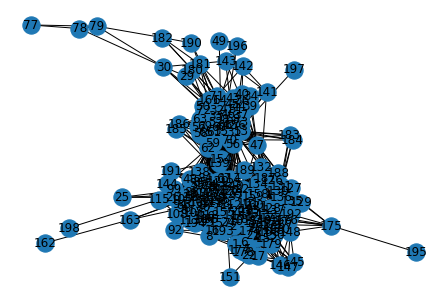

In [36]:
nx.draw_spring(g, with_labels = True)
plt.show()

In [37]:
list(g.neighbors(175))

[129, 131, 133, 137, 148, 166, 167, 176, 195]

## Graph statistics

In [38]:
n = nx.number_of_nodes(g)
print('Number of nodes:', n)
print('Number of edges:', nx.number_of_edges(g))
g_degree_distribution = list(dict(g.degree()).values())
print('Average degree:', np.mean(g_degree_distribution))
g_p = nx.density(g)
print('Density:', round(g_p, 2))
print('Diameter:', nx.diameter(g))
g_c = np.mean(list(nx.clustering(g).values()))
print('Average clustering coefficient:', round(g_c, 2))
g_l = nx.average_shortest_path_length(g)
print('Average shortest path length:', round(g_l, 2))

Number of nodes: 198
Number of edges: 2742
Average degree: 27.696969696969695
Density: 0.14
Diameter: 6
Average clustering coefficient: 0.62
Average shortest path length: 2.24


In [39]:
list(dict(g.degree()).values())

[23,
 42,
 40,
 46,
 60,
 49,
 49,
 23,
 20,
 60,
 56,
 21,
 75,
 43,
 10,
 74,
 45,
 29,
 43,
 12,
 23,
 96,
 20,
 26,
 17,
 43,
 41,
 39,
 31,
 52,
 100,
 19,
 8,
 9,
 8,
 24,
 48,
 38,
 11,
 29,
 25,
 55,
 48,
 41,
 51,
 46,
 30,
 39,
 40,
 34,
 34,
 37,
 32,
 31,
 32,
 33,
 34,
 33,
 14,
 14,
 18,
 27,
 39,
 44,
 31,
 29,
 23,
 35,
 23,
 27,
 23,
 59,
 31,
 53,
 27,
 55,
 28,
 46,
 13,
 21,
 37,
 20,
 36,
 6,
 25,
 46,
 39,
 24,
 42,
 37,
 56,
 45,
 36,
 57,
 27,
 26,
 42,
 25,
 32,
 33,
 53,
 62,
 9,
 59,
 27,
 26,
 41,
 28,
 30,
 24,
 16,
 10,
 39,
 19,
 29,
 12,
 8,
 17,
 31,
 18,
 13,
 14,
 20,
 20,
 13,
 41,
 3,
 15,
 13,
 52,
 20,
 46,
 54,
 4,
 7,
 45,
 40,
 5,
 3,
 4,
 6,
 5,
 14,
 5,
 6,
 6,
 16,
 25,
 31,
 39,
 13,
 28,
 31,
 19,
 16,
 40,
 33,
 16,
 17,
 40,
 31,
 17,
 12,
 22,
 6,
 3,
 2,
 29,
 19,
 19,
 23,
 22,
 23,
 24,
 24,
 31,
 17,
 20,
 18,
 20,
 25,
 1,
 7,
 7,
 19,
 19,
 23,
 13,
 2,
 18,
 1,
 5,
 2,
 4,
 1,
 9,
 1,
 1]

In [40]:
nx.shortest_path (g, 163, 1)

[163, 90, 7, 1]

In [41]:
list(nx.all_shortest_paths (g, 163, 1))

[[163, 90, 7, 1],
 [163, 93, 7, 1],
 [163, 117, 7, 1],
 [163, 90, 11, 1],
 [163, 117, 11, 1],
 [163, 90, 13, 1],
 [163, 93, 13, 1],
 [163, 90, 18, 1],
 [163, 93, 18, 1],
 [163, 117, 18, 1],
 [163, 90, 20, 1],
 [163, 93, 20, 1],
 [163, 117, 20, 1],
 [163, 90, 23, 1],
 [163, 93, 23, 1],
 [163, 117, 23, 1],
 [163, 90, 24, 1],
 [163, 117, 24, 1],
 [163, 93, 10, 1],
 [163, 93, 12, 1],
 [163, 93, 14, 1],
 [163, 93, 15, 1],
 [163, 93, 16, 1],
 [163, 93, 19, 1],
 [163, 93, 22, 1]]

## Centrality

In [42]:
nx.degree_centrality(g)

{1: 0.11675126903553298,
 10: 0.21319796954314718,
 11: 0.20304568527918782,
 12: 0.23350253807106597,
 13: 0.3045685279187817,
 14: 0.24873096446700504,
 15: 0.24873096446700504,
 16: 0.11675126903553298,
 17: 0.10152284263959391,
 18: 0.3045685279187817,
 19: 0.2842639593908629,
 2: 0.10659898477157359,
 20: 0.38071065989847713,
 21: 0.2182741116751269,
 22: 0.050761421319796954,
 23: 0.3756345177664974,
 24: 0.22842639593908629,
 3: 0.14720812182741116,
 4: 0.2182741116751269,
 5: 0.06091370558375634,
 6: 0.11675126903553298,
 7: 0.4873096446700507,
 8: 0.10152284263959391,
 9: 0.13197969543147206,
 120: 0.08629441624365482,
 121: 0.2182741116751269,
 122: 0.2081218274111675,
 123: 0.1979695431472081,
 124: 0.15736040609137056,
 125: 0.2639593908629441,
 67: 0.5076142131979695,
 130: 0.09644670050761421,
 145: 0.04060913705583756,
 146: 0.04568527918781726,
 147: 0.04060913705583756,
 148: 0.12182741116751268,
 149: 0.24365482233502536,
 150: 0.19289340101522842,
 157: 0.05583756345

In [43]:
nx.pagerank(g)

{1: 0.004054274378673574,
 10: 0.006862707924183666,
 11: 0.006348121073056098,
 12: 0.007042873280094578,
 13: 0.009252881141315877,
 14: 0.007526997296145854,
 15: 0.007525209268080119,
 16: 0.004096604727493827,
 17: 0.003948478855530476,
 18: 0.009060762038158074,
 19: 0.008477095263097457,
 2: 0.003629854939089149,
 20: 0.011216290798180817,
 21: 0.006771035514800392,
 22: 0.0023280777780608723,
 23: 0.011461609126898618,
 24: 0.007112614875989314,
 3: 0.005209316576796491,
 4: 0.006771035514800392,
 5: 0.0025503283665934537,
 6: 0.00402055427111106,
 7: 0.0145479567746197,
 8: 0.0036687876924427435,
 9: 0.004665455240792083,
 120: 0.0031520212674609684,
 121: 0.006692238260507386,
 122: 0.006913305548546279,
 123: 0.006565244504702942,
 124: 0.005251047446745982,
 125: 0.008412364075460537,
 67: 0.016575536080634494,
 130: 0.0039476268042185425,
 145: 0.0020950809239109044,
 146: 0.0022570247261652424,
 147: 0.0020950809239109044,
 148: 0.004688249397420556,
 149: 0.0076402356758

In [44]:
nx.betweenness_centrality(g)

{1: 0.000851342222753862,
 10: 0.013289336862047309,
 11: 0.004313951504203767,
 12: 0.0034177056601804854,
 13: 0.01407907557385525,
 14: 0.004380981675579163,
 15: 0.004792559595517549,
 16: 0.002018648490290283,
 17: 0.0018039443649464706,
 18: 0.009455168971331605,
 19: 0.008640471063891916,
 2: 0.0005763956613445939,
 20: 0.017638257970617546,
 21: 0.002207951859421836,
 22: 0.000687091522571601,
 23: 0.03960002124911093,
 24: 0.00624230305403988,
 3: 0.006628843999510171,
 4: 0.002207951859421836,
 5: 0.0008563381619116215,
 6: 0.0008049075549189744,
 7: 0.057538917986120146,
 8: 0.001435756058631026,
 9: 0.004031837519016956,
 120: 0.0005919700809628333,
 121: 0.0057962894806967424,
 122: 0.009338368742625251,
 123: 0.00712743976648565,
 124: 0.0029765031418601184,
 125: 0.01766588737089527,
 67: 0.15105615373941586,
 130: 0.005193766161005843,
 145: 1.2725757960400039e-05,
 146: 5.5010340672829014e-05,
 147: 1.2725757960400039e-05,
 148: 0.004881208142758188,
 149: 0.0124023251

In [45]:
dc = np.array(list(nx.degree_centrality(g).values()))
pr = np.array(list(nx.pagerank(g).values()))
bc = np.array(list(nx.betweenness_centrality(g).values()))
np.corrcoef(pr, bc)

array([[1.       , 0.6908592],
       [0.6908592, 1.       ]])

## Attributes and Weighted Graphs

In [46]:
g = nx.Graph()
g.add_edges_from([[1,2], 
                 [2,3],
                 [2,4],
                 [1,5],
                 [3,5],
                 [4,5]])

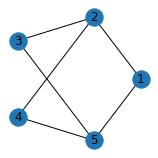

In [47]:
plt.figure(figsize = (2, 2))
nx.draw_circular(g, with_labels = True)
plt.show()

In [48]:
g[1][2]

{}

In [49]:
g[1][2]["weight"] = 2
g[2][3]["weight"] = 4
g[2][4]["weight"] = 3
g[1][5]["weight"] = 5
g[3][5]["weight"] = 2
g[4][5]["weight"] = 4


In [50]:
nx.dijkstra_path_length (g, 1, 4, weight="weight")

5

In [51]:
g[1][2]

{'weight': 2}

## Coloring

In [52]:
c = nx.greedy_color(g)
c

{2: 0, 5: 0, 1: 1, 3: 1, 4: 1}

In [53]:
g.nodes()

NodeView((1, 2, 3, 4, 5))

In [54]:
colors = ["r", "g", "b", "y"]
nc = [colors[c[x]] for x in g.nodes()]
nc

['g', 'r', 'g', 'g', 'r']

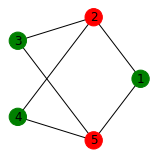

In [55]:
plt.figure(figsize = (2, 2))
nx.draw_circular(g, with_labels = True, node_color=nc)
plt.show()

In [56]:
g.add_edge(1,4)
g.edges()

EdgeView([(1, 2), (1, 5), (1, 4), (2, 3), (2, 4), (3, 5), (4, 5)])

In [57]:
c = nx.greedy_color(g)
nc = [colors[c[x]] for x in g.nodes()]
nc

['r', 'g', 'r', 'b', 'g']

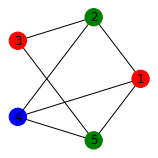

In [58]:
plt.figure(figsize = (2, 2))
nx.draw_circular(g, with_labels = True, node_color=nc)
plt.show()

## Directed Graps

In [59]:
g = nx.DiGraph()

In [60]:
g.nodes()

NodeView(())

In [61]:
g.add_edges_from([[1,3],[2,4], [4,1], [3,2],[4,3]])

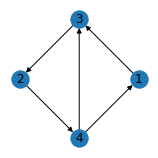

In [62]:
plt.figure(figsize = (2, 2))
nx.draw_circular(g, with_labels = True)
plt.show()

In [63]:
nx.shortest_path(g,1,4)

[1, 3, 2, 4]

In [64]:
nx.to_numpy_array(g)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 1., 0., 0.]])